# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

## Loading the dataset

In [2]:
data = pd.read_csv('used_device_data.csv')

## Data Overview

- Observations
- Sanity checks

In [3]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [4]:
print("OBSERVATION: There are", data.shape[0], "rows and", data.shape[1], "columns in the dataset.")

OBSERVATION: There are 3454 rows and 15 columns in the dataset.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

OBSERVATION:
<br>

**Data Characteristics:**
The data includes a combination of numeric types (float and int) and categorical types (object), such as brand_name, os, 4g, and 5g, necessitating encoding before model fitting.

**Handling Missing Values:**
Several numerical variables, including main_camera_mp, selfie_camera_mp, int_memory, ram, battery, and weight, contain missing values that need to be addressed.

**Potential Feature Engineering:**
Consider creating new features like device age derived from release_year and days_used.

In [6]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


OBSERVATION:

**Findings:**

- Android emerges as the predominant operating system.
- The majority of devices are equipped with 4G capability.
- Only a small fraction, specifically 152 out of 3454, support 5G.
- Most devices are relatively recent, manufactured post-2013, and have been in use for less than three years (averaging approximately 3 years of use, calculated as 1094 days ÷ 365 days/year).
- The average price, both for used and new devices, is low, approximately 4 and 5 euros respectively, with minimal variability, suggesting that the dataset predominantly includes affordable devices.

In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

OBSERVATION:
<br>
* main_camera_mp has the most missing values at 179 missing values

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

### Univariate Analysis

In [9]:
# copy of original data labeled as EDA - Exploratory data analysis
df_eda = data.copy()

In [10]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [11]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

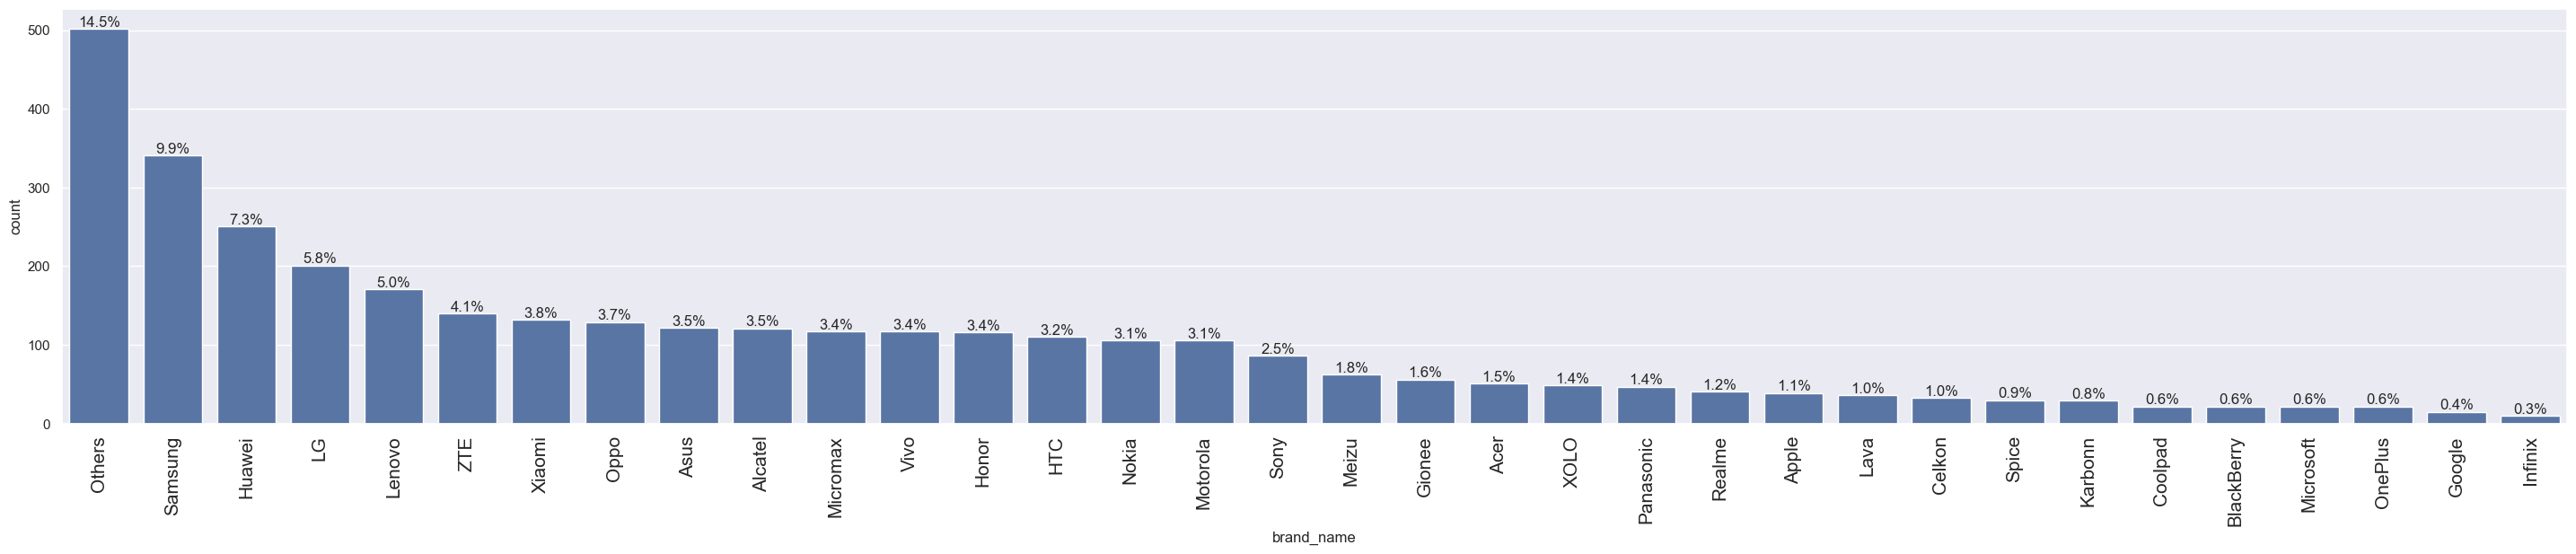

In [12]:
labeled_barplot(df_eda, 'brand_name' , perc=True)

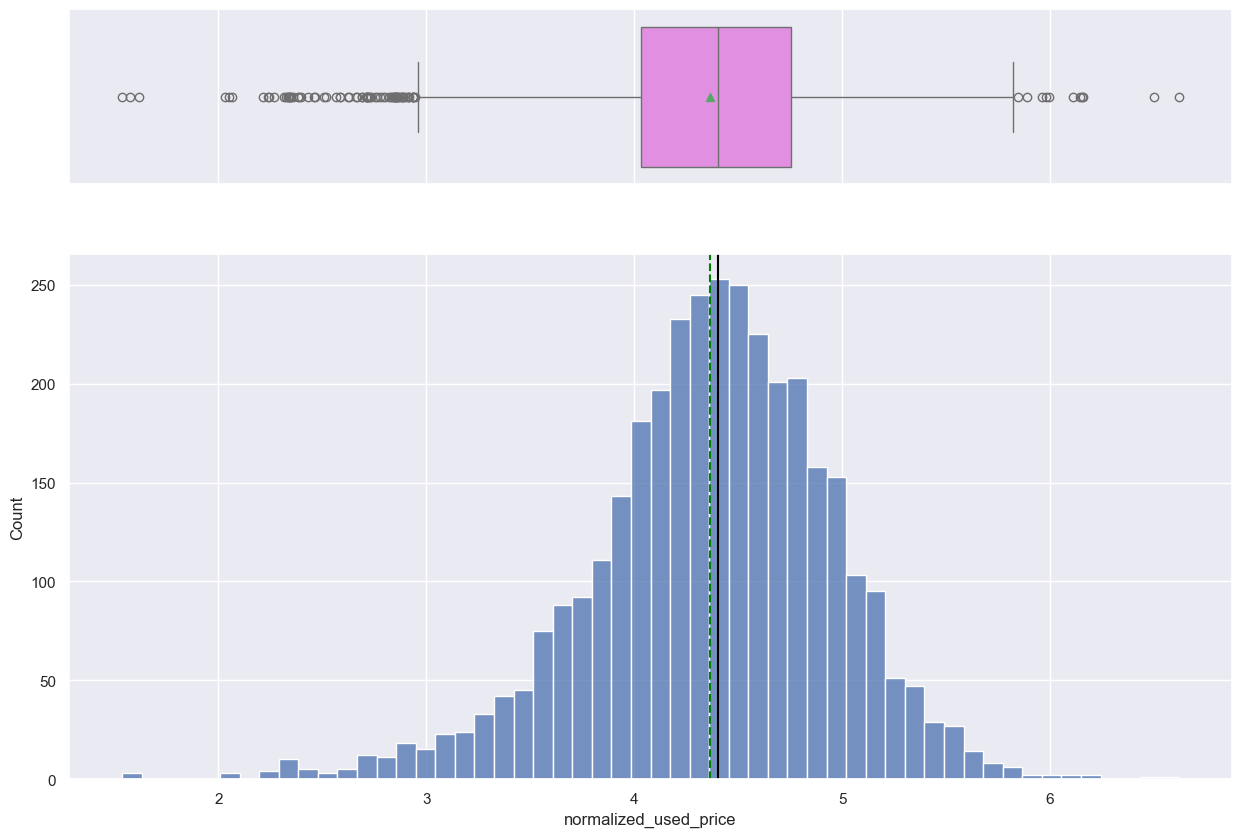

In [13]:
histogram_boxplot(df_eda , "normalized_used_price")

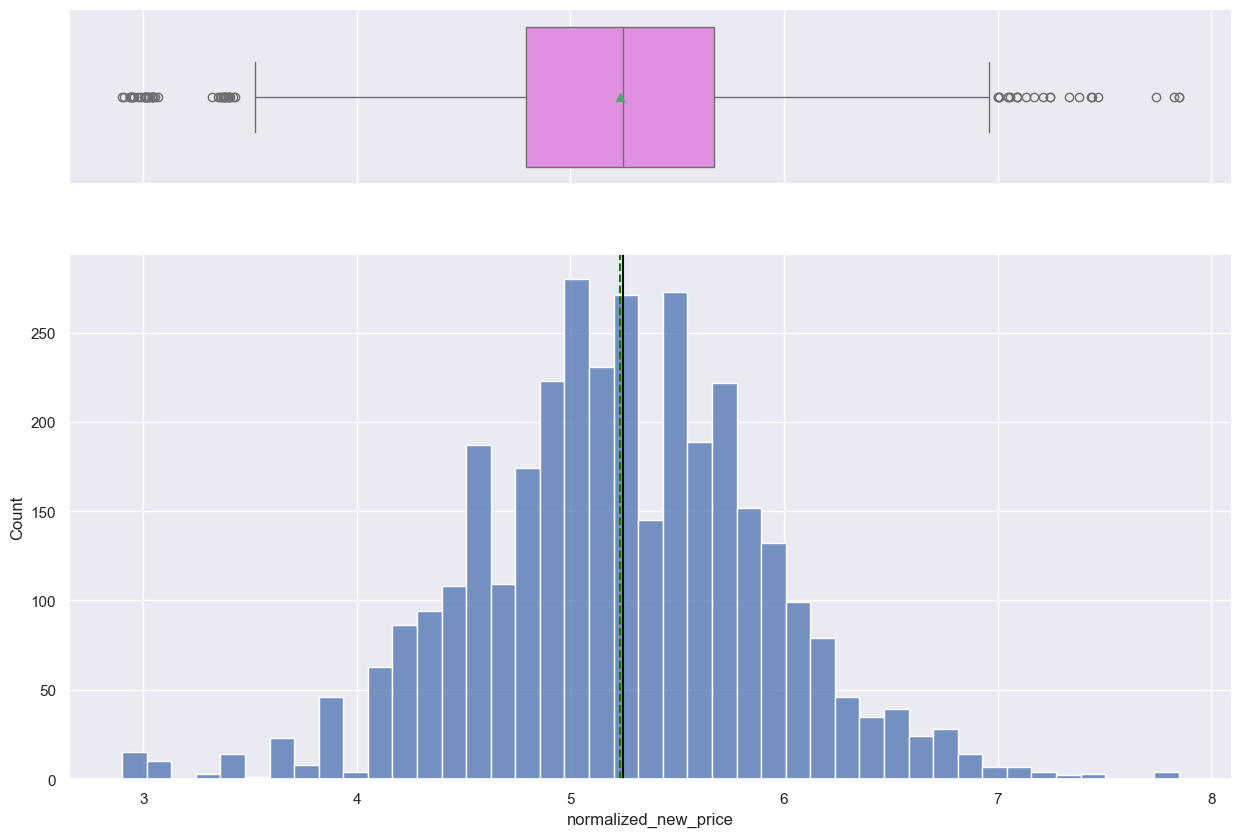

In [14]:
histogram_boxplot(df_eda , "normalized_new_price")

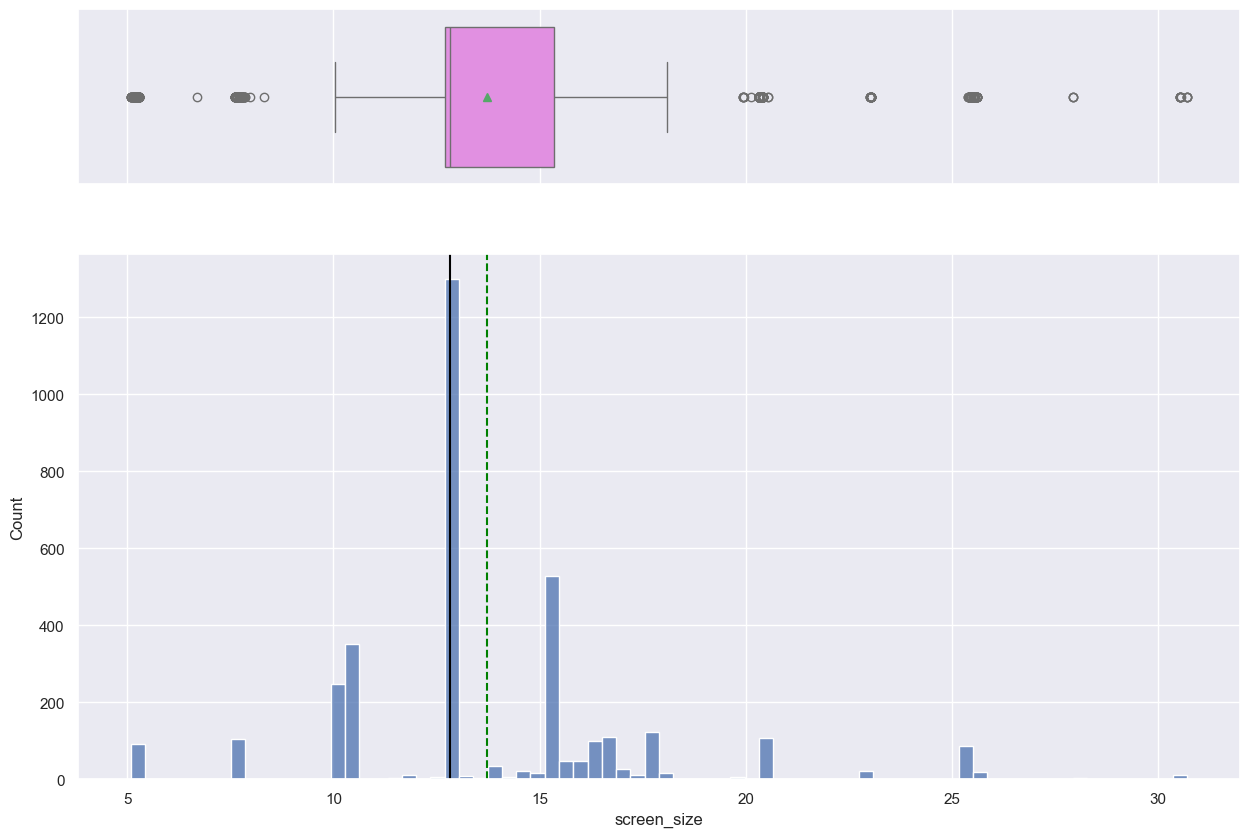

In [15]:
histogram_boxplot(df_eda , "screen_size")

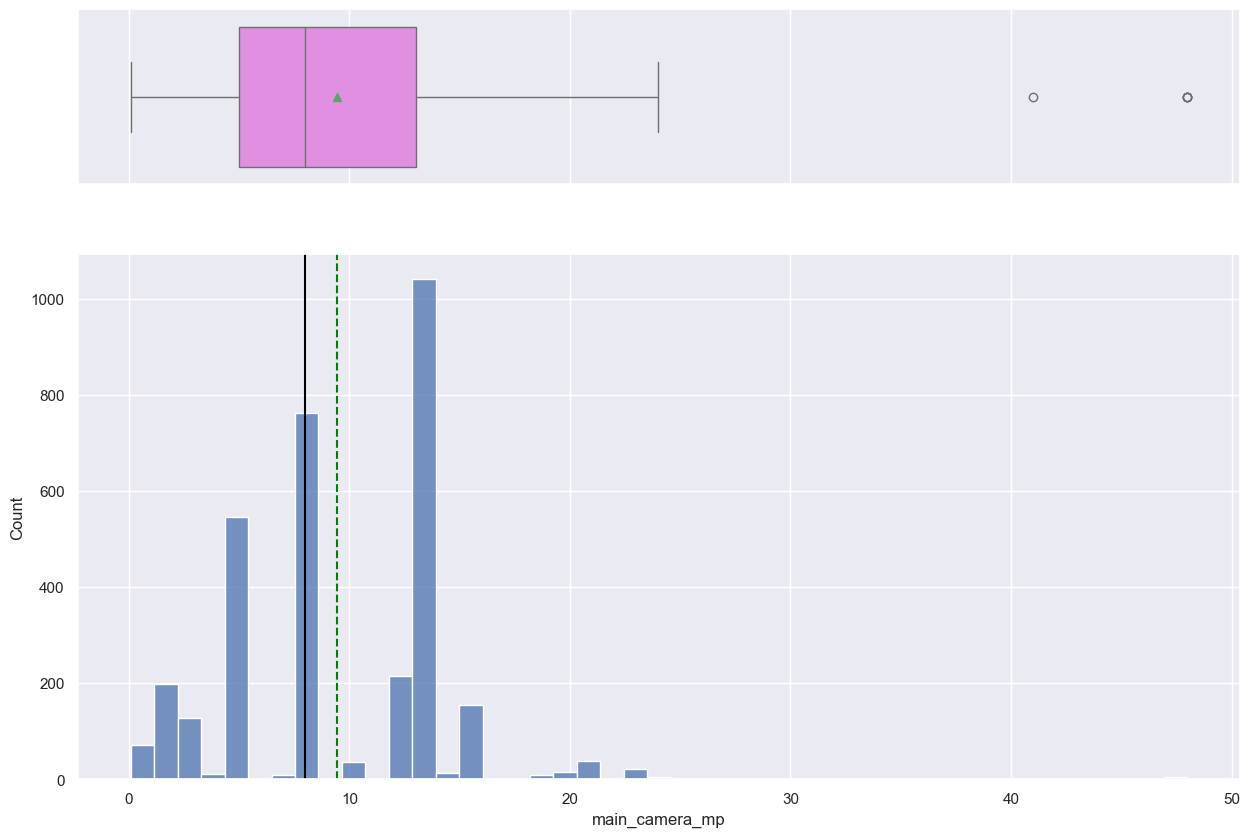

In [16]:
histogram_boxplot(df_eda , "main_camera_mp")

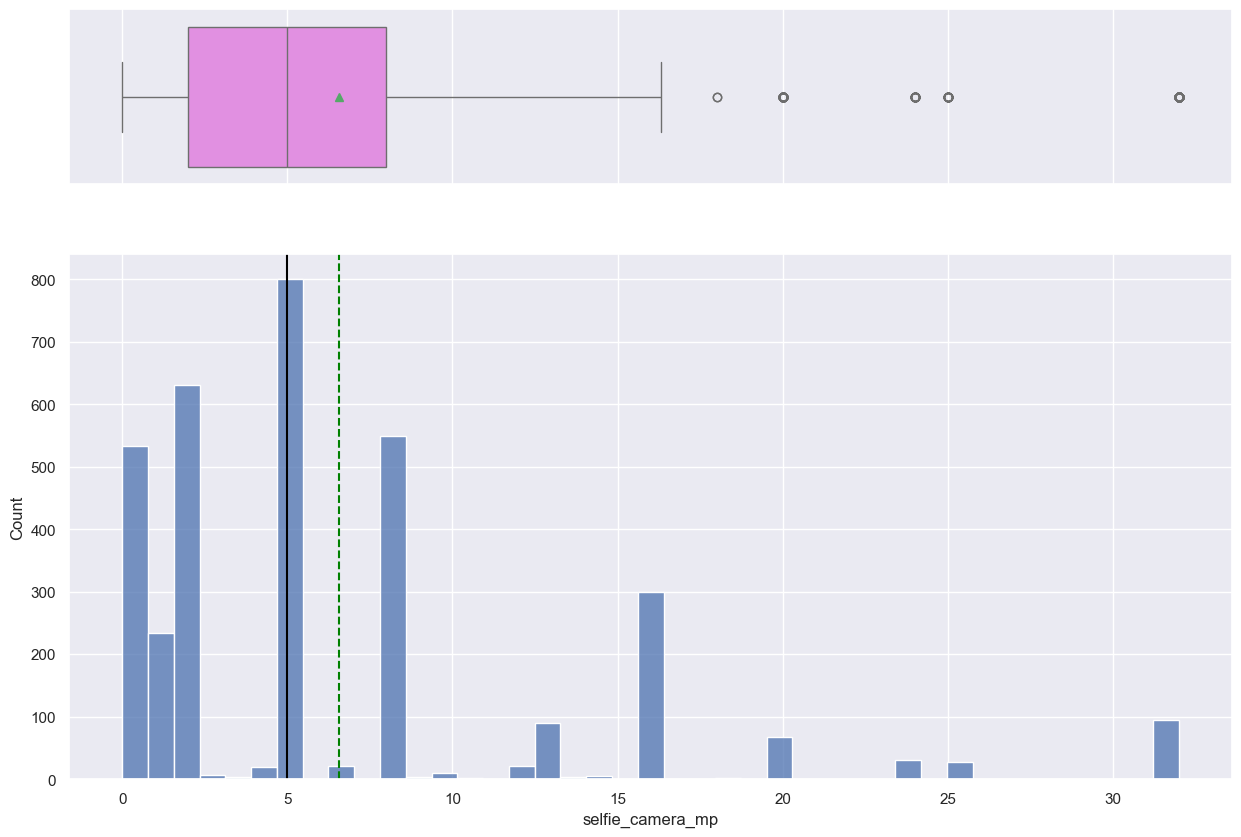

In [17]:
histogram_boxplot(df_eda , "selfie_camera_mp")

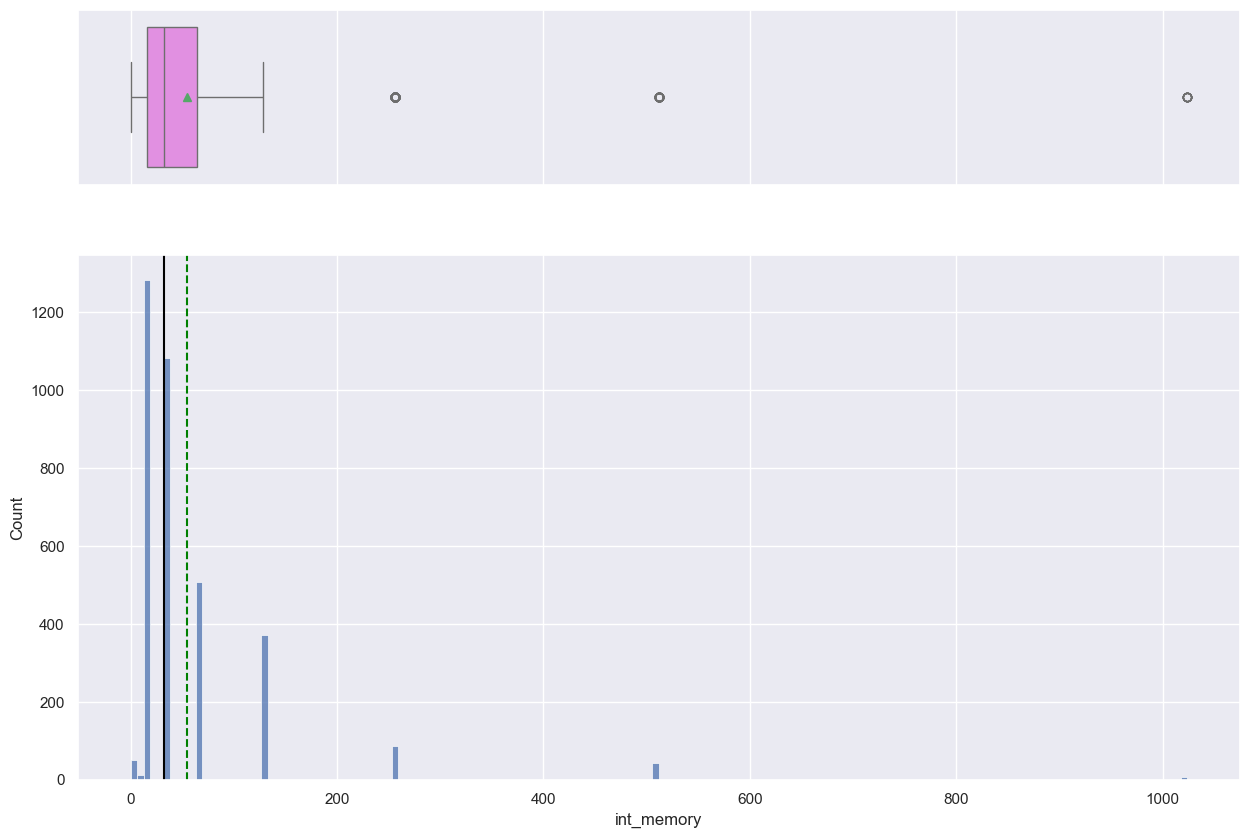

In [18]:
histogram_boxplot(df_eda , "int_memory")

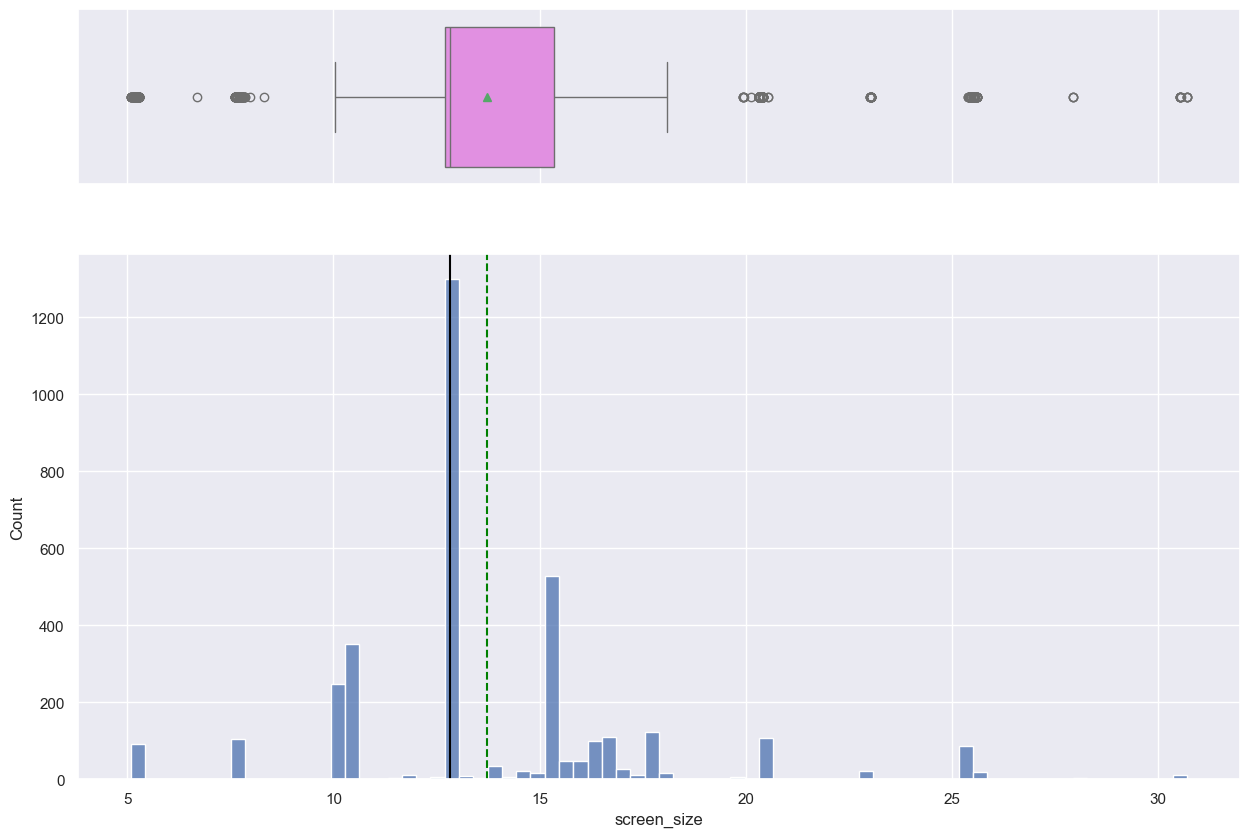

In [19]:
histogram_boxplot(df_eda , "screen_size")

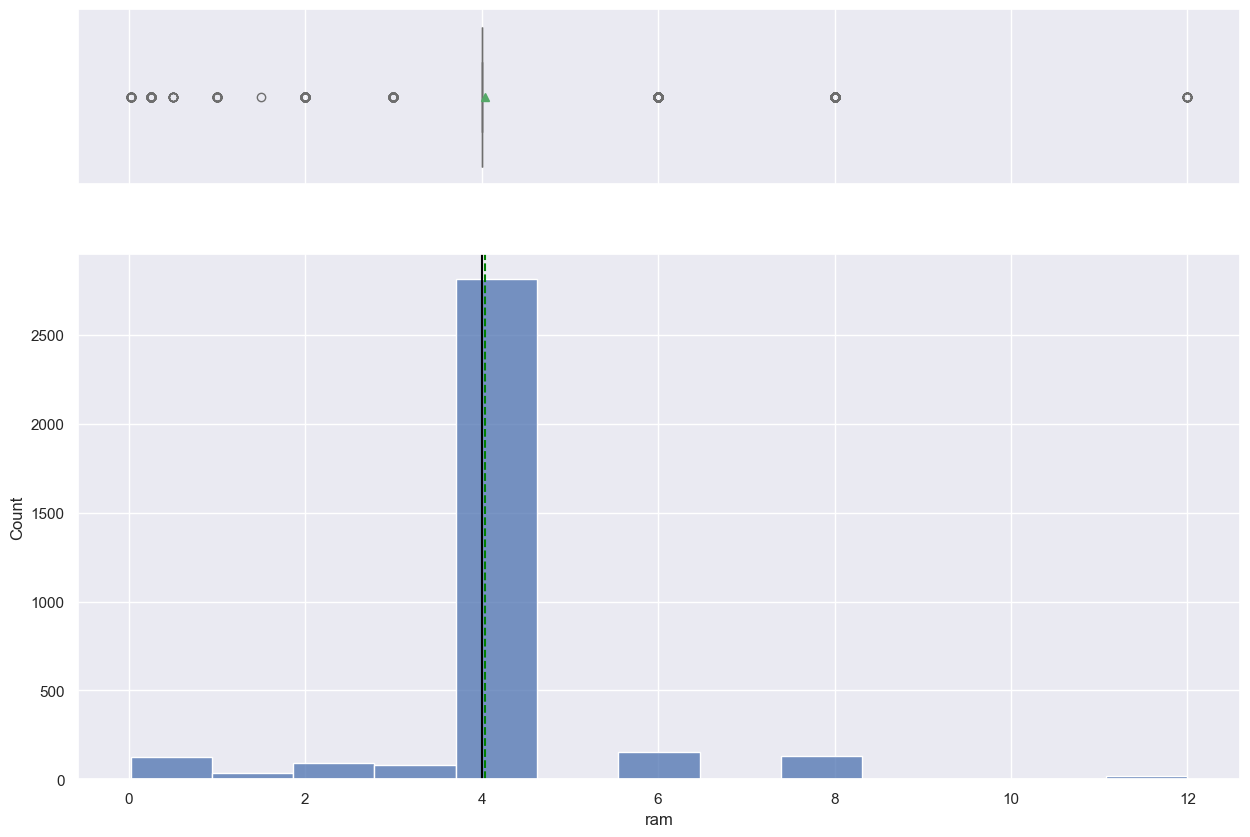

In [20]:
histogram_boxplot(df_eda , "ram")

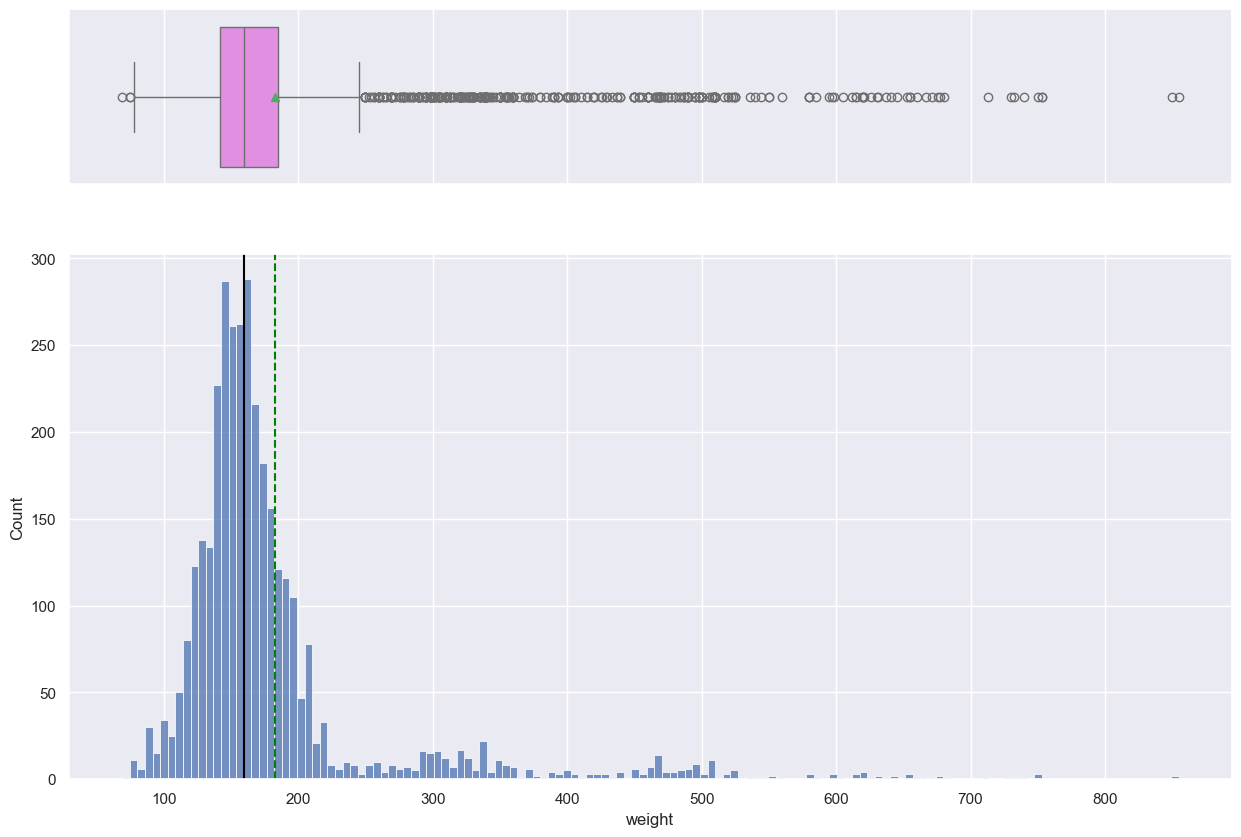

In [21]:
histogram_boxplot(df_eda , "weight")

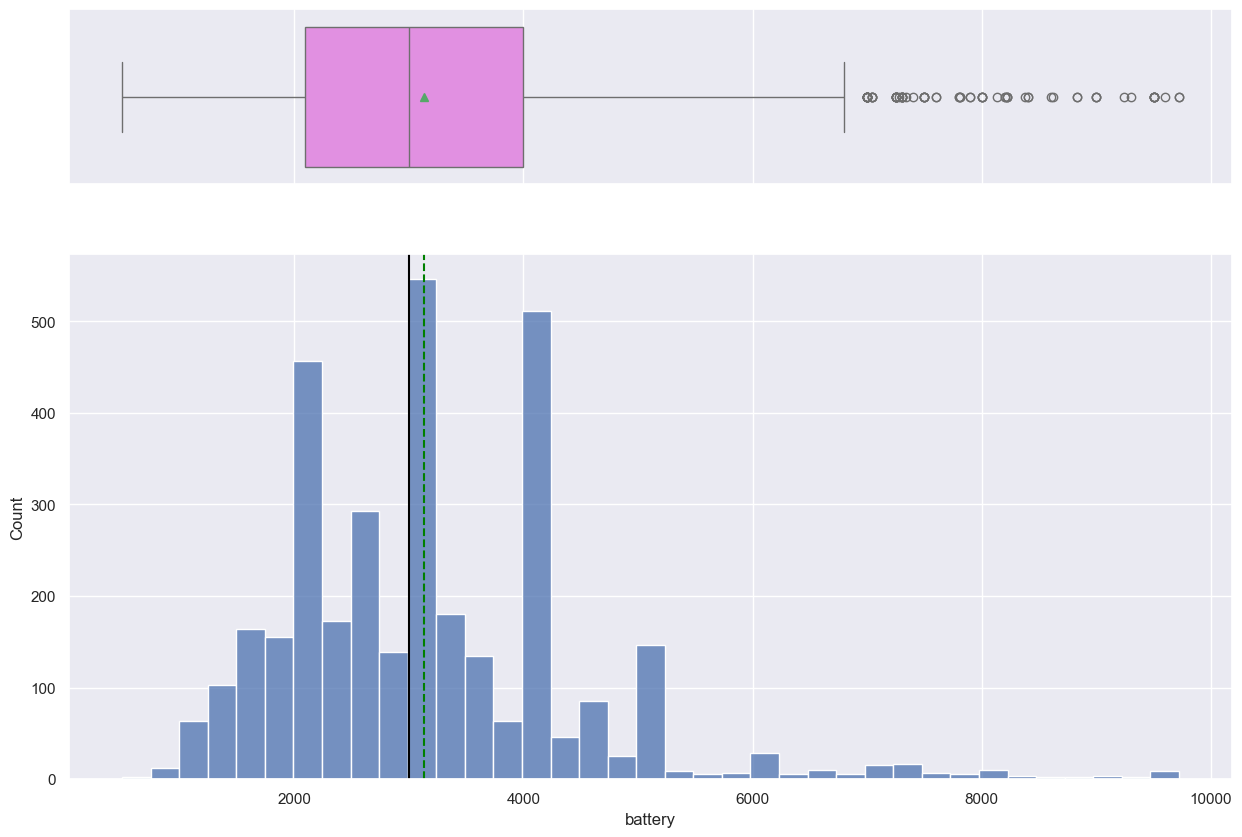

In [22]:
histogram_boxplot(df_eda , "battery")

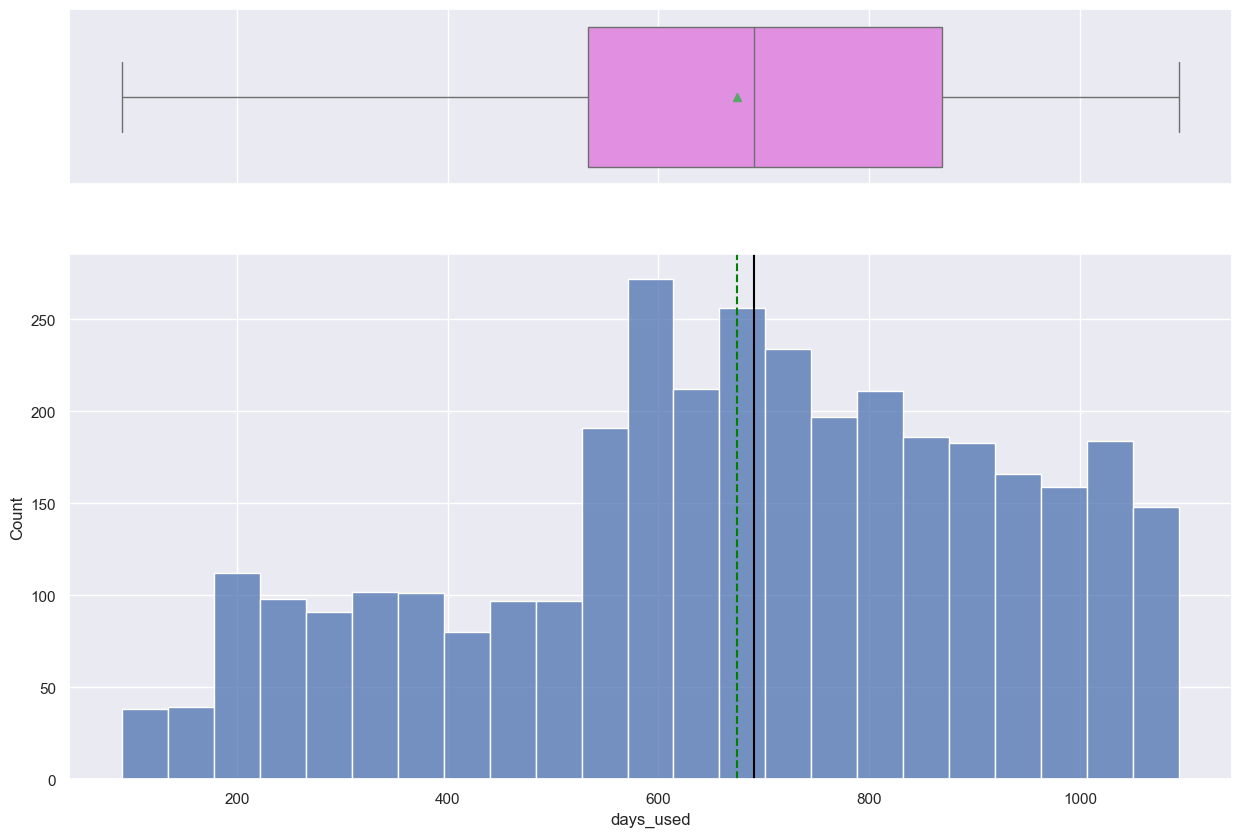

In [23]:
histogram_boxplot(df_eda , "days_used")

REVIEWED AND OBSERVED DATA:
<br>
**Review:**

**Central Tendency:** The green dashed line (mean) and the black solid line (median) depict the central tendency of the distribution.

**Spread:** The width of the box in the boxplot represents the interquartile range (IQR), indicating how dispersed the middle 50% of the data is.

**Outliers:** Data points significantly outside the main distribution suggest prices that are much higher or lower compared to the majority.

**Distribution Shape:** The histogram, with the KDE curve, illustrates the distribution's shape. A bell-shaped distribution approximates normality, while other shapes may indicate skewness or multiple peaks.

**Observations:**

**screen_size:**
- Concentration around 14-15 cm suggests a common standard.
- Right skew suggests non-linearity, possibly requiring transformation for linear modeling.

**main_camera_mp:**
- High concentration in lower megapixels, fewer high-megapixel devices.
- Consider binning or transformation for linear models due to right skew.

**selfie_camera_mp:**
- Lower-end specs are more prevalent, with occasional high-end specs.
- Outliers may need attention for linear regression's normality assumption.

**int_memory:**
- Devices with higher memory are less frequent.
- Non-linear transformation or categorization could aid in modeling.

**ram:**
- Concentrated around a single value (typically 4GB).
- Low variance in RAM may not strongly impact linear model predictions.

**battery:**
- Right-skewed distribution with some high-capacity outliers.
- Transformation or outlier treatment might ensure homoscedasticity in residuals.

**weight:**
- Most devices are lighter; right skew indicates some heavier models like tablets.
- Skewness suggests potential need for data transformation for linearity.

**release_year:**
- Consistent release frequency over time without significant outliers.
- Temporal data management is crucial to avoid multicollinearity.

**days_used:**
- Symmetrical distribution around the median.
- Normal distribution suggests no transformation needed for linear regression.

**normalized_used_price:**
- Fairly symmetrical, bell-shaped distribution.
- Normal distribution supports linear regression assumptions.

**normalized_new_price:**
- Presence of outliers indicates price variation for new devices.
- Outlier management may be essential to prevent undue influence on regression models.

Correlation check

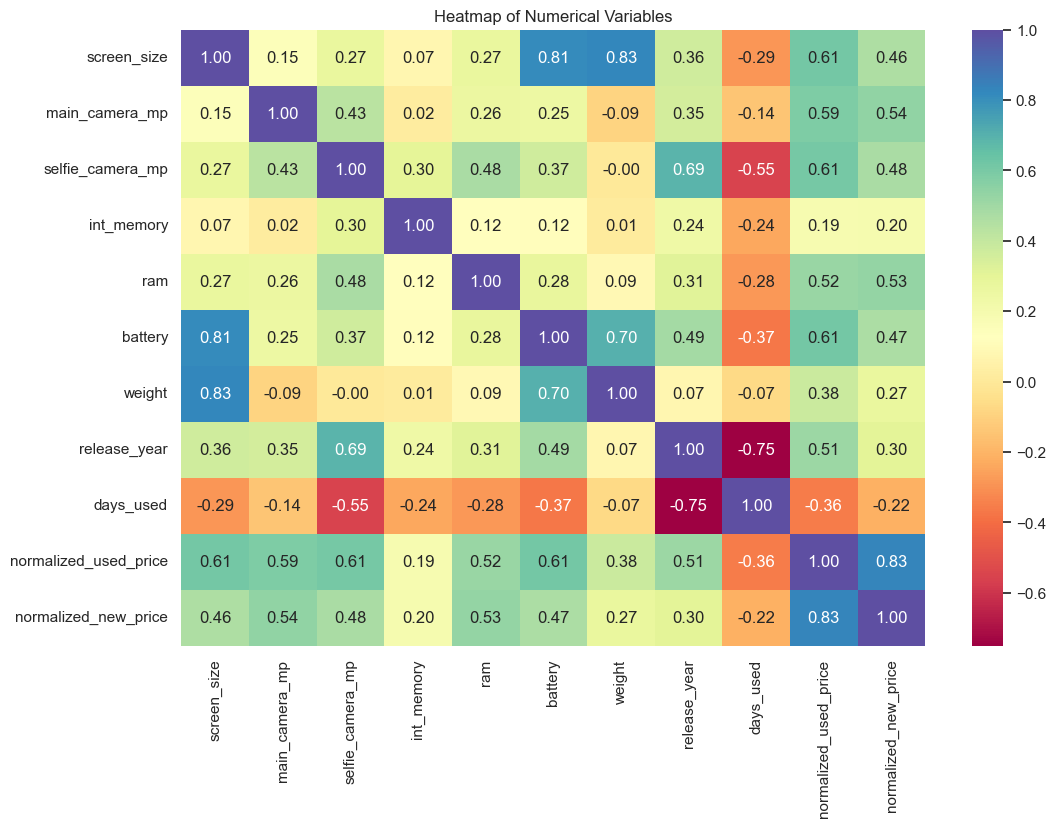

In [24]:
# Creating a heatmap for the numerical variables in the dataframe
numeric_df_eda = df_eda.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df_eda.corr(), annot=True, cmap='Spectral', fmt=".2f")
plt.title("Heatmap of Numerical Variables")
plt.show()



**Observations:**

- **Strong Positive Correlations:**
  - Battery and weight are strongly positively correlated at 0.70.
  - Both battery (0.81) and weight (0.83) demonstrate almost equal strong positive correlations with screen_size.
  - Screen_size, battery, and selfie_camera_mp exhibit identical positive correlations with the target variable (0.61).
  - Weight (0.38) shows a weaker direct correlation with the target. The strong correlations of battery and screen_size with the target suggest considering them for model inclusion. However, weight's lower correlation may indicate reduced predictive utility and potential multicollinearity with battery due to shared information.

- **Normalized Price Correlations:**
  - There exists a strong positive correlation between normalized_used_price and normalized_new_price, indicating that the original device price strongly predicts its second-hand price.

- **Correlations with Target Variable:**
  - The target variable shows notable positive correlations with main_camera_mp, release_year, and ram, suggesting these features are robust predictors of the used device price.

- **Release Year and Usage Days:**
  - Release_year negatively correlates strongly with days_used, which aligns logically with newer devices having fewer usage days.
  - Days_used negatively correlates with normalized_used_price and normalized_new_price, indicating that as device usage duration increases, both its used and new prices tend to decrease.

**Multicollinearity Management Strategy:**

- Conduct Variance Inflation Factor (VIF) analysis to evaluate the extent of multicollinearity among independent variables before making decisions about their inclusion or modification.
- Consider employing dimensionality reduction techniques such as Principal Component Analysis (PCA), or regularization methods like Ridge (L2) or Lasso (L1), to address multicollinearity effectively and improve model interpretability and performance.

1. What does the Distribution of normalized use device prices look like?

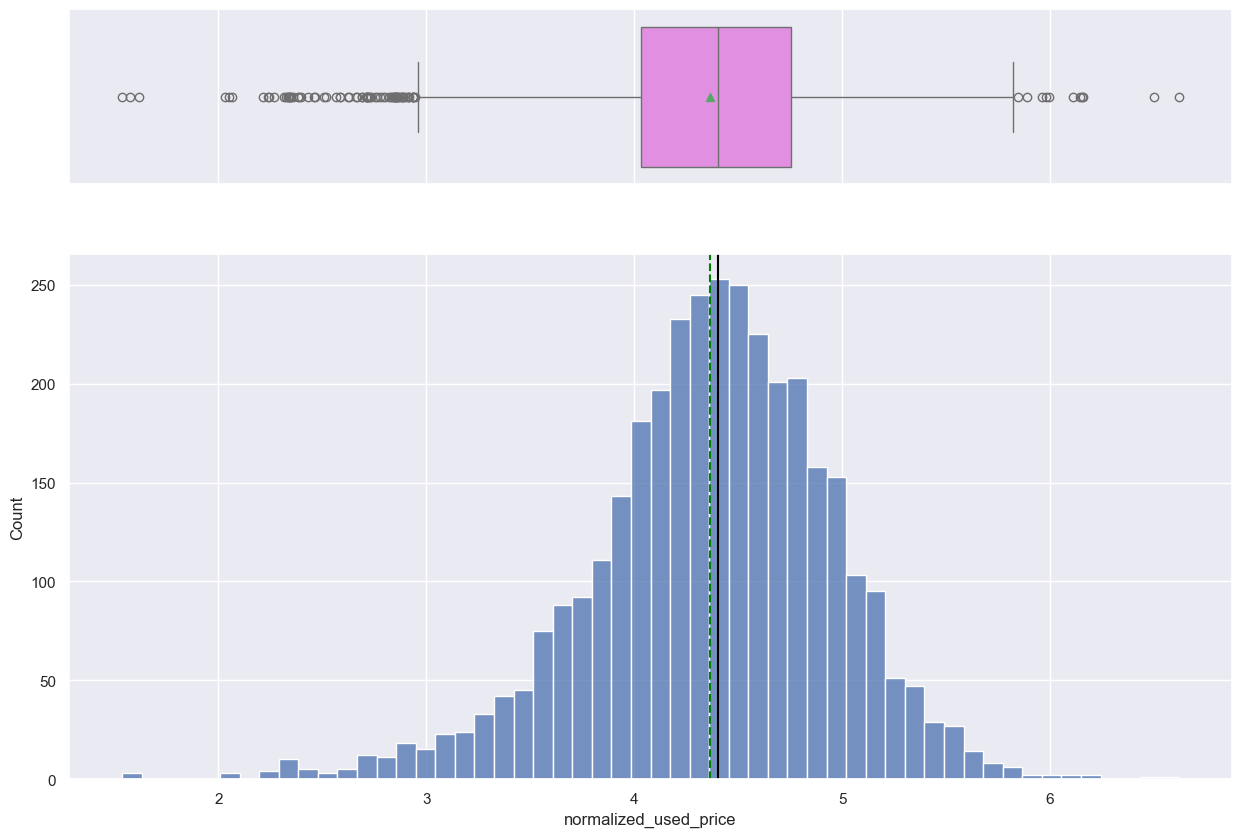

In [25]:
histogram_boxplot(df_eda, "normalized_used_price")

Observation: 
* Symmetrical, bell-shaped distribution.
* Normal distribution of target variable supports linear regression assumptions.
There are some outliers but they are symetrical on both sides and thus will leave untreted.

2. What percentage of the used device market is dominated by Android devices?

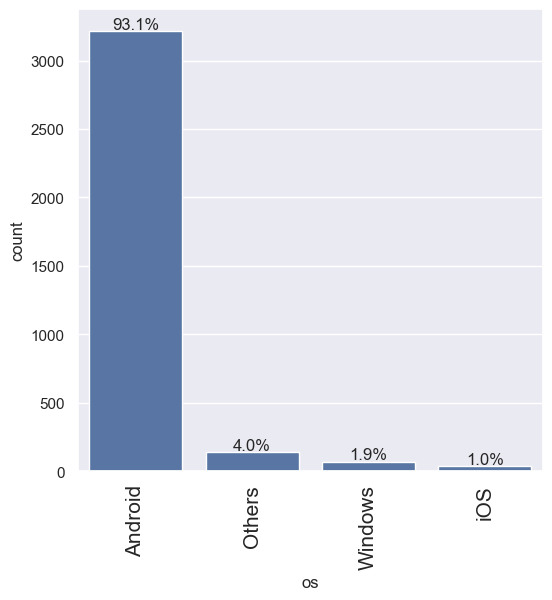

In [26]:
labeled_barplot(df_eda , "os" , perc=True)

Androids are 93% of the market

3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

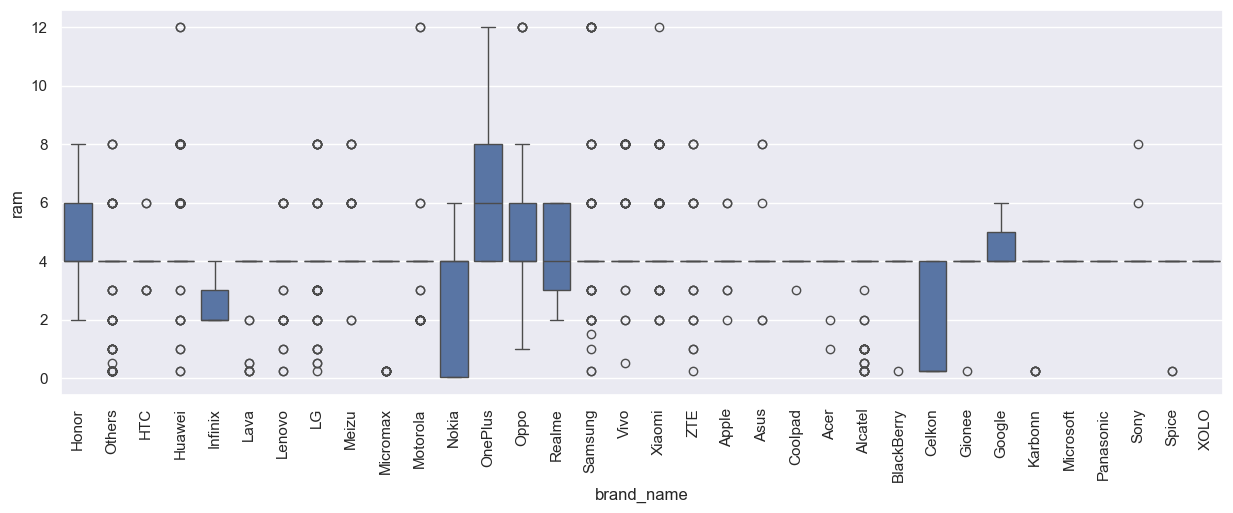

In [27]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_eda, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

**Observations:**

- **Outliers:** RAM capacities for several brands show outliers, suggesting the presence of special edition models with unusually high or low RAM, or possibly data entry errors.

- **Skewed Distributions:** Some brands exhibit skewed distributions in RAM capacity, either towards the lower or higher end of the scale. This skewness should be addressed during data preprocessing, particularly if RAM is a significant predictor in the modeling process.

- **Normalization/Standardization:** Considering the wide range of RAM values and the presence of outliers, normalization or standardization may be necessary to bring this feature onto a comparable scale with other variables in the dataset.

4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [28]:
df_large_battery = df_eda[df_eda.battery > 4500]
df_large_battery.shape

(341, 15)

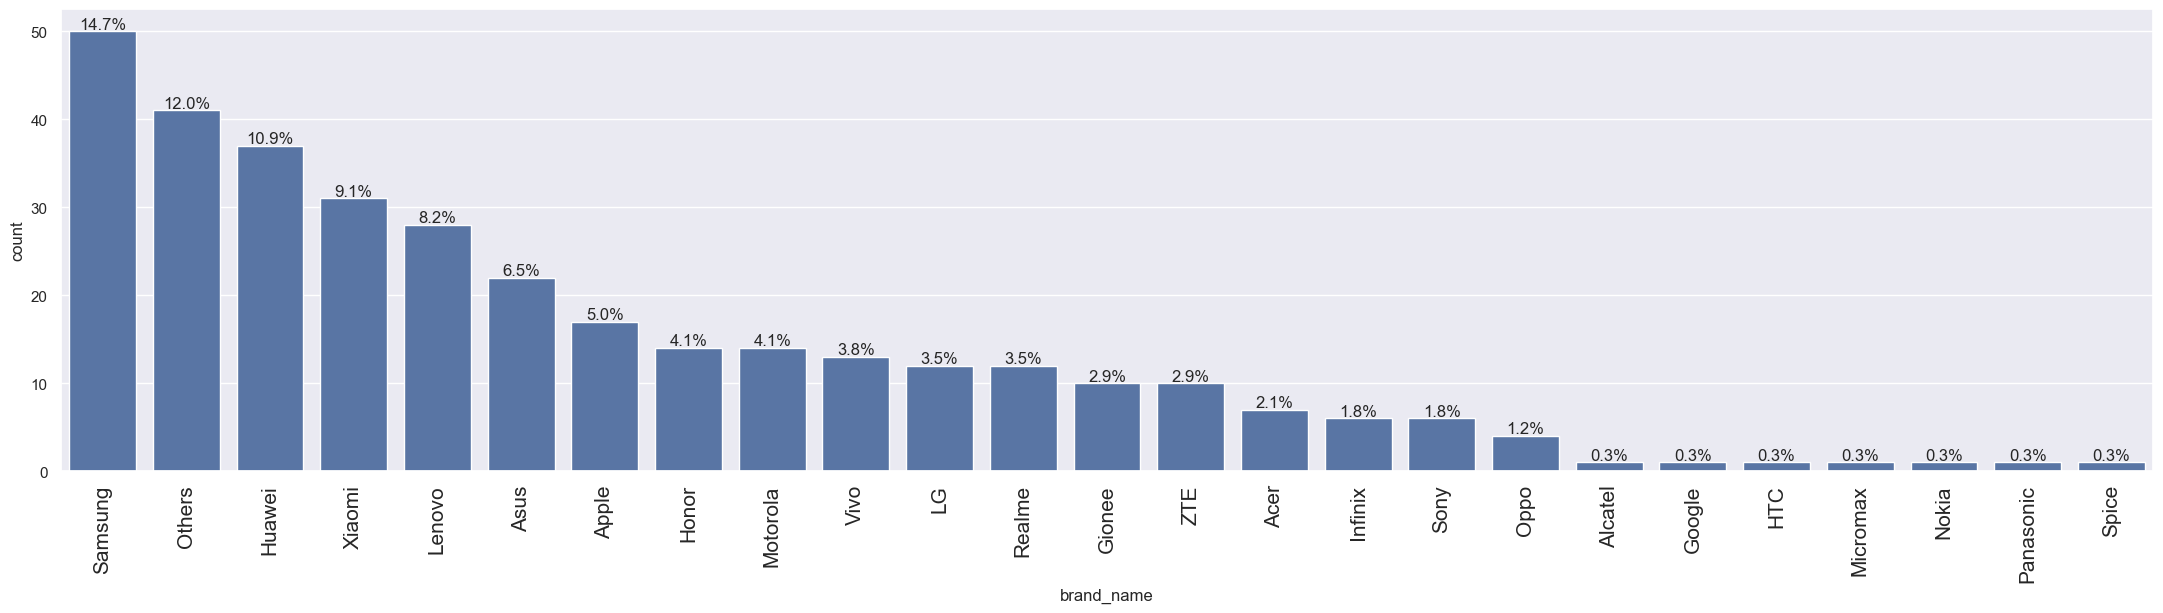

In [29]:
labeled_barplot(df_large_battery, 'brand_name', perc=True)

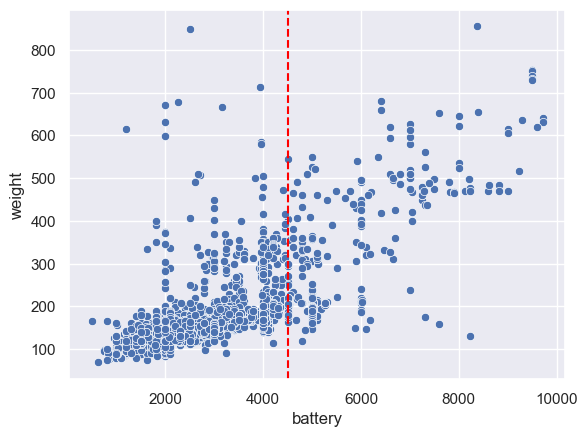

In [30]:
sns.scatterplot(data=df_eda, y=df_eda['weight'], x=df_eda['battery']) 
plt.axvline(x=(4500), label='>= 4500', linestyle='--', color='red');

OBSERVATION:
* There exists a positive linear relationship between weight and battery capacity. As battery capacity increases, so does device weight. Beyond the threshold of 4500mAh, fewer devices are observed, resulting in greater spacing in the graph. Later, I will quantify this linear relationship using correlation coefficients.

5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [31]:
#6 inches = 6*2.54cm = 15.24cm
df_large_screen = df_eda[df_eda["screen_size"]>15.24]
print(df_large_screen.shape)

(1099, 15)


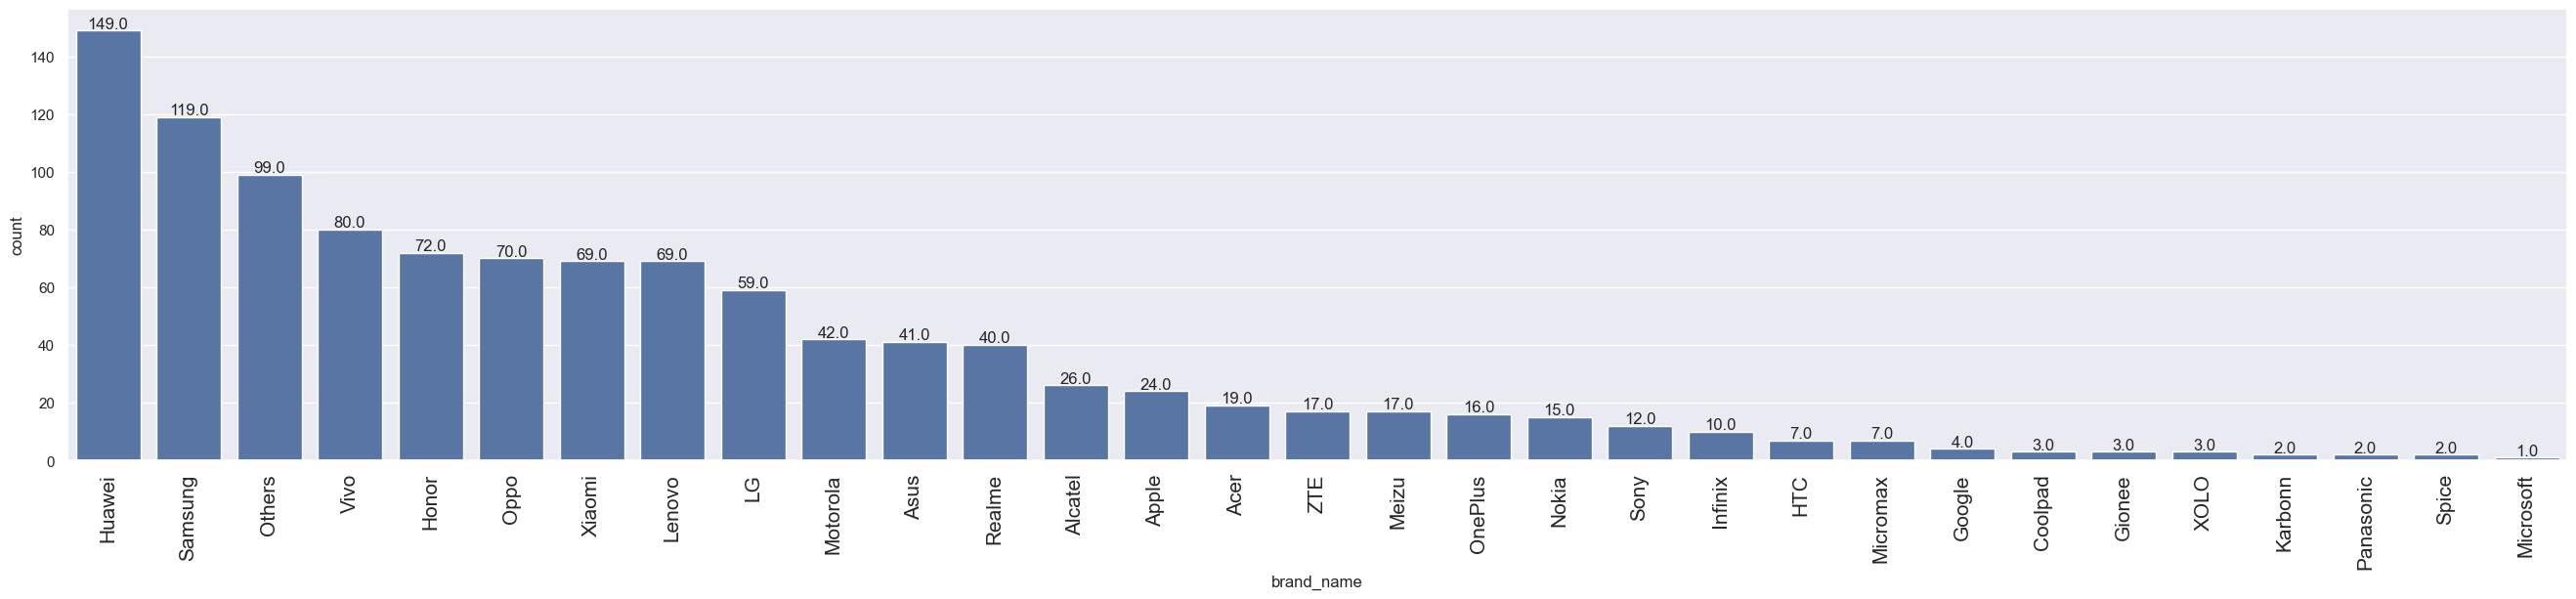

In [32]:
labeled_barplot(df_large_screen, 'brand_name')

In [33]:
print(df_large_screen.shape) 
print("Devices with more than 6 inches correspond to",str(round((df_large_screen.shape[0]/df_eda.shape[0])*100,2)) +"% of the dataset")

(1099, 15)
Devices with more than 6 inches correspond to 31.82% of the dataset


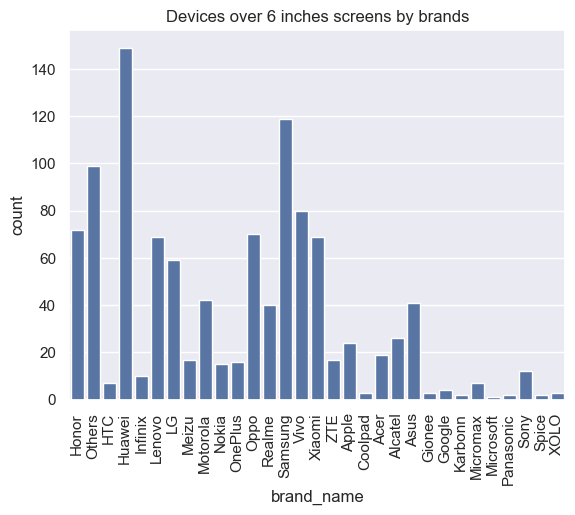

In [34]:
sns.countplot(data=df_large_screen, x='brand_name')
plt.xticks(rotation=90) 
plt.title('Devices over 6 inches screens by brands');




**Insights:**

Devices with more than 6 inches correspond to 35.55% of the dataset

- **Brand Diversity:** The category labeled "Others" dominates by a significant margin, suggesting a diverse array of less common brands that offer large-screen devices. This indicates a fragmented market with numerous participants.

- **Market Leaders:** Samsung, Huawei, and LG emerge as the top brands, indicating a substantial presence in the market for large-screen used devices.

- **Potential Pricing Influence:** Screen size likely plays a crucial role in determining the prices of used devices. Therefore, after encoding, it's advisable to investigate this correlation before preprocessing or transforming the brand_name variable.

6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

In [35]:
df_selfie_camera = df_eda[df_eda.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

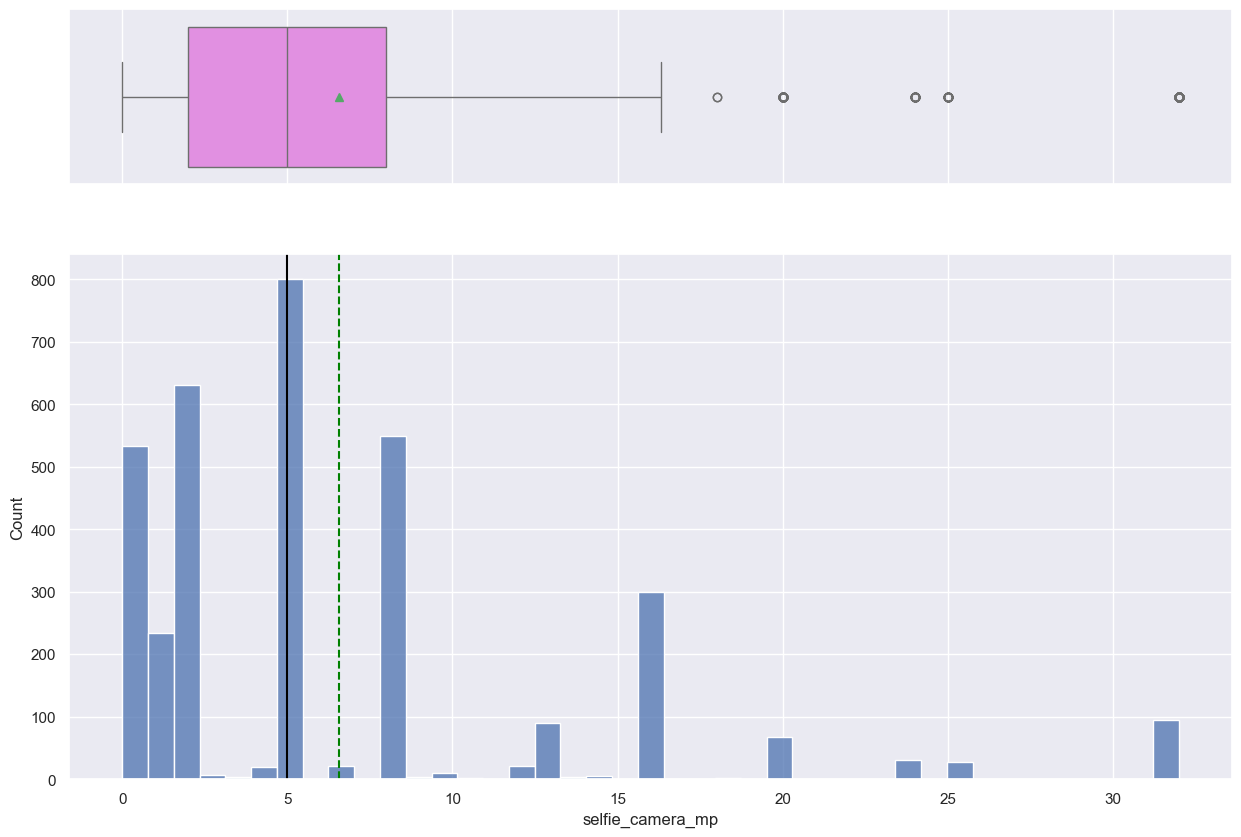

In [36]:
histogram_boxplot(df_eda, 'selfie_camera_mp')

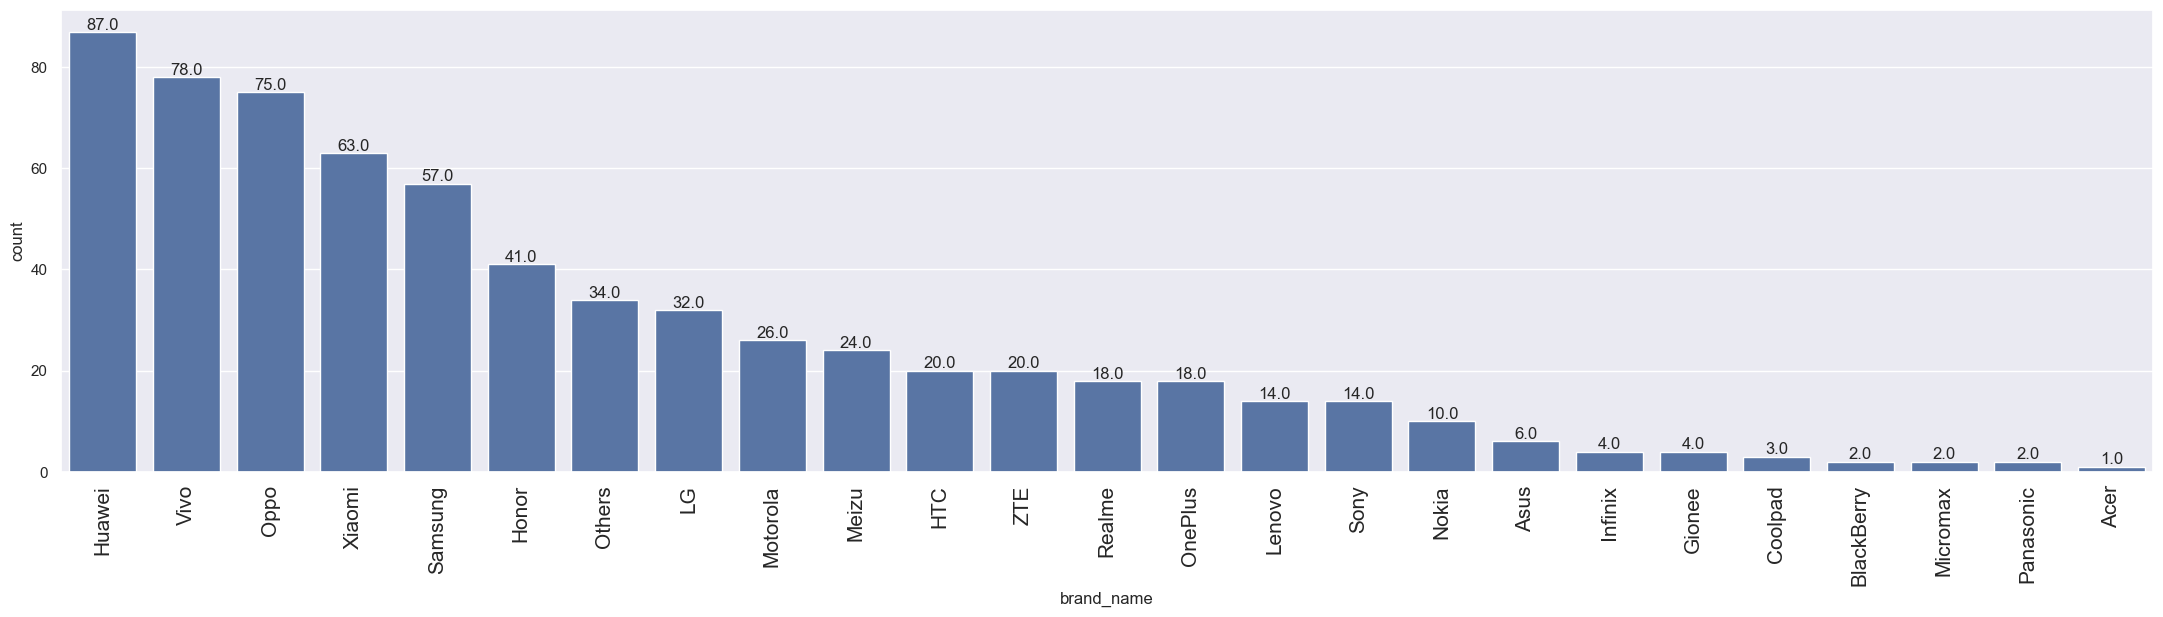

In [37]:
selfie= df_eda[df_eda['selfie_camera_mp']> 8]
labeled_barplot(selfie, 'brand_name' , perc=False)

OBSERVATIONS:
<br>
* Huawei leads the count for devices with selfie cameras greater than 8MP
* Vivo and Oppo also have a significant number of devices with high-res selfie cameras, which may reflect their marketing focus on camera capabilities as a key selling point.
* Multiple brands (including market leaders like Samsung), suggests there is a trend toward consumers who use their phones for selfies. 

7. Which attributes are highly correlated with the normalized price of a used device?

In [38]:
# Correlation matrix
correlation_matrix = df_eda.corr(numeric_only=True)
# Correlation with 'normalized_used_price'
correlation_with_price = correlation_matrix["normalized_used_price"].sort_values(ascending=False)

print(correlation_with_price)

normalized_used_price    1.000000
normalized_new_price     0.834496
screen_size              0.614785
battery                  0.613619
selfie_camera_mp         0.608074
main_camera_mp           0.587302
ram                      0.520289
release_year             0.509790
weight                   0.382354
int_memory               0.190993
days_used               -0.358264
Name: normalized_used_price, dtype: float64


OBSERVATION:
<br>
The normalized price of a used device shows a strong positive correlation with its normalized new price, battery capacity, selfie camera resolution, and screen size. Conversely, the normalized price is negatively correlated with the number of days the device has been used.

* positive correlation with normalized price
* Moderate correlation between feature
    * screen size
    * battery life
    * selfie camera
    * main camera
    * ram
    <br>

* Low Correlation between weight and memory
Negative Correlation between days used- as the device is used the price declines

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [39]:
df_preprocess = df_eda.copy()

In [40]:
df1 = df_eda.copy()

# Missing Values

In [41]:
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

Not all missing values went away. There could be insuggicent data. Broden the grouping criteria by brand name. 

In [42]:
#Overall column median by brand imputation
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

# impute the missing values in cols_impute with median by grouping the data on brand name
for col in cols_impute:
    df_preprocess[col] = df_preprocess[col].fillna(
        value=df_preprocess.groupby(['brand_name'])[col].transform("median")
    )

# check missing values after imputing the above columns
df_preprocess.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                4
ram                       4
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

Filled in missing values in the main camera column

In [43]:
# Complete the code to impute the data with median
df_preprocess['main_camera_mp'] = df_preprocess['main_camera_mp'].fillna(df_preprocess['main_camera_mp'].median())

## check missing values after imputing the above columns
df_preprocess.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               4
ram                      4
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

## Feature Engineering?

# Outliers

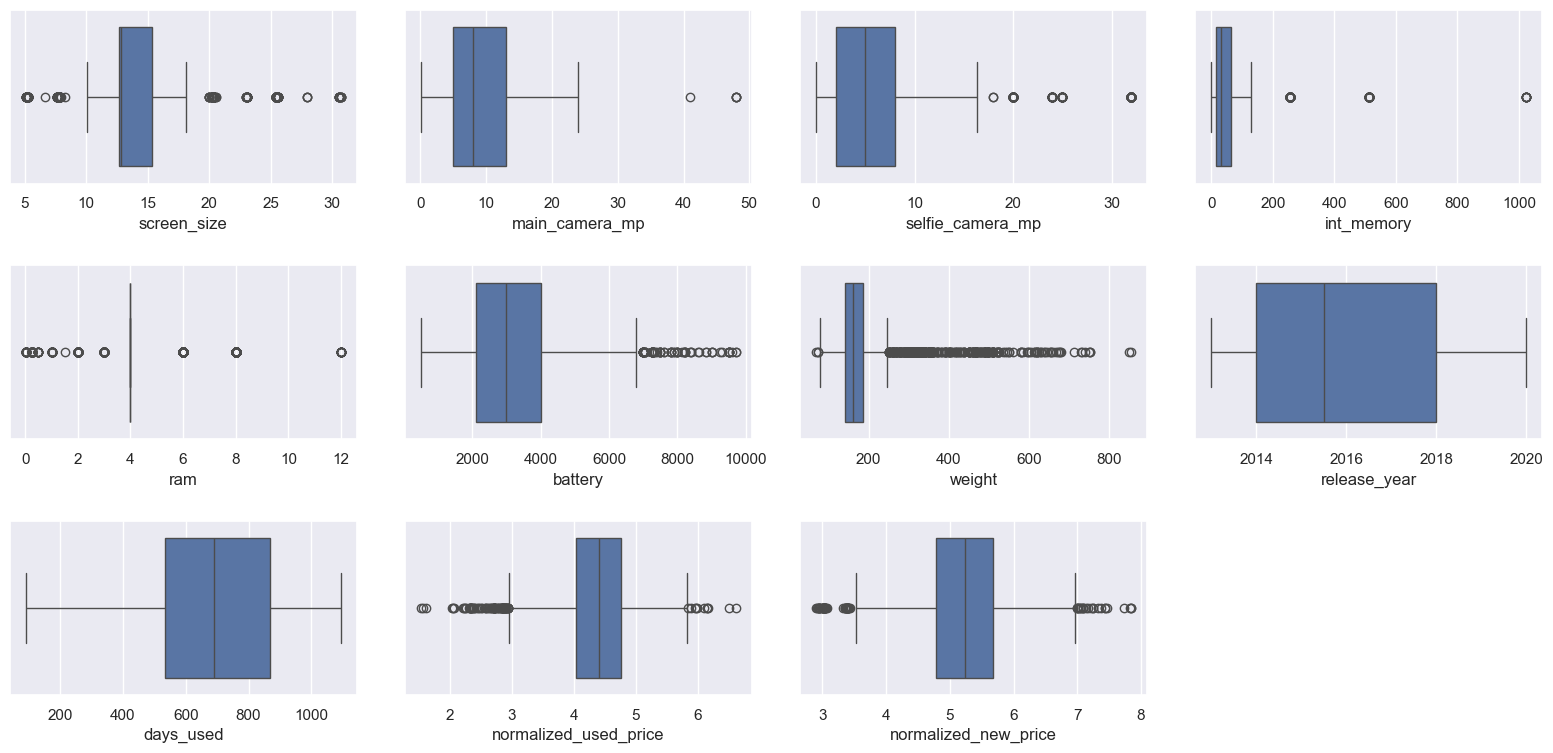

In [44]:
# outlier detection using boxplot
num_cols = df_preprocess.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(16, 8))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df_preprocess, x=variable)
    plt.tight_layout(pad=2)

plt.show()

In [45]:
# Columns specified for log transformation
cols_to_log = ["normalized_new_price", "normalized_used_price", "weight"]

# Applying log transformation directly to the original columns
for col in cols_to_log:
    df_preprocess[col] = np.log(df_preprocess[col])

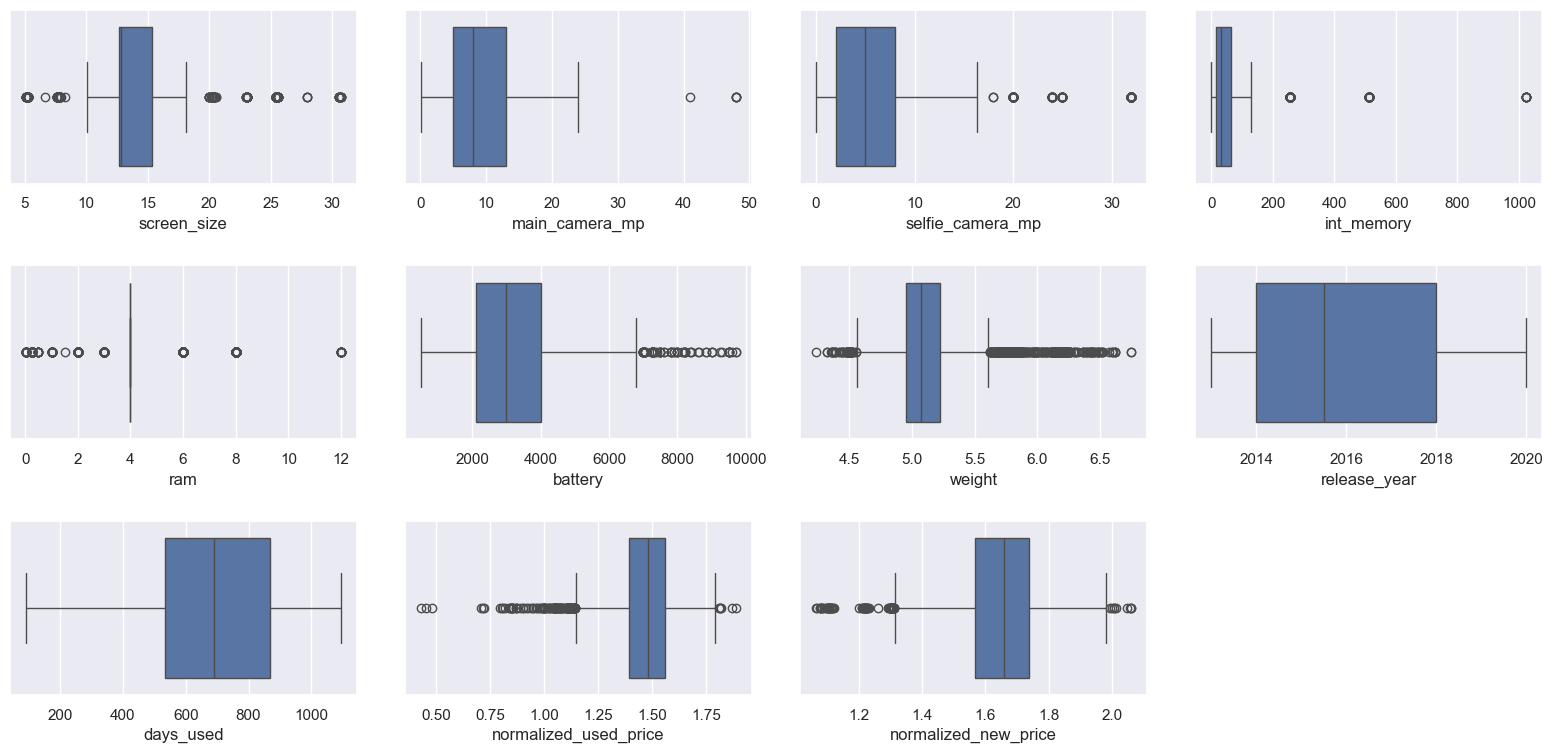

In [46]:
# displaying boxplots after outlier treatment
num_cols = df_preprocess.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(16, 8))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df_preprocess, x=variable)
    plt.tight_layout(pad=2)

plt.show()

OBSERVATION:
<br>

**Observations:**

- **Scale Adjustment:** The log transformation has altered the data scale, evident in the compressed axis ranges of the log-transformed boxplots compared to the wider ranges in the original data. 

- **Distribution Symmetry:** Log transformation can enhance the symmetry of skewed distributions. While this effect may be subtle in boxplots, it becomes more pronounced in histograms or kernel density plots, making it a valuable step in post-preprocessed EDA.

- **Outlier Mitigation:** The transformation has brought outliers closer to the central distribution, diminishing their visual and statistical impact.

- **Categorical Encoding:** Categorical variables are encoded using dummy variables (also known as one-hot encoding), facilitating their inclusion in the modeling process.

In [47]:
# Create dummy variables
df_preprocess_encoded = pd.get_dummies(df_preprocess, columns=["brand_name", "os", "4g", "5g"], drop_first=True)

# Convert boolean columns to integer
bool_cols = df_preprocess_encoded.select_dtypes(include=['bool']).columns
df_preprocess_encoded[bool_cols] = df_preprocess_encoded[bool_cols].astype(int)

# Check the result
df_preprocess_encoded.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,3.0,3020.0,4.983607,2020,127,1.460375,...,0,0,0,0,0,0,0,0,1,0
1,17.30,13.0,16.0,128.0,8.0,4300.0,5.361292,2020,325,1.641343,...,0,0,0,0,0,0,0,0,1,1
2,16.69,13.0,8.0,128.0,8.0,4200.0,5.361292,2020,162,1.631411,...,0,0,0,0,0,0,0,0,1,1
3,25.50,13.0,8.0,64.0,6.0,7250.0,6.173786,2020,345,1.636155,...,0,0,0,0,0,0,0,0,1,1
4,15.32,13.0,8.0,64.0,3.0,5000.0,5.220356,2020,293,1.479328,...,0,0,0,0,0,0,0,0,1,0


# Data Prepration for Modeling

In [48]:
# Define the dependent and independent variables
X = df_preprocess_encoded.drop('normalized_used_price', axis=1)
y = df_preprocess_encoded['normalized_used_price']

print(X.head())
print()
print(y.head())

   screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  battery  \
0        14.50            13.0               5.0        64.0  3.0   3020.0   
1        17.30            13.0              16.0       128.0  8.0   4300.0   
2        16.69            13.0               8.0       128.0  8.0   4200.0   
3        25.50            13.0               8.0        64.0  6.0   7250.0   
4        15.32            13.0               8.0        64.0  3.0   5000.0   

     weight  release_year  days_used  normalized_new_price  ...  \
0  4.983607          2020        127              1.550770  ...   
1  5.361292          2020        325              1.708200  ...   
2  5.361292          2020        162              1.772344  ...   
3  6.173786          2020        345              1.728280  ...   
4  5.220356          2020        293              1.598951  ...   

   brand_name_Spice  brand_name_Vivo  brand_name_XOLO  brand_name_Xiaomi  \
0                 0                0                

In [49]:
X = sm.add_constant(X)

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Model Building - Linear Regression

In [52]:
olsmodel1 = sm.OLS(y_train, x_train).fit()
print(olsmodel1.summary())

MissingDataError: exog contains inf or nans


**OLS Regression Results for the Fitted Model:**

- **R-squared (0.840):** This indicates that the model accounts for 84% of the variance in the dependent variable, signifying a robust fit.
  
- **Adjusted R-squared (0.837):** The close proximity of the adjusted R-squared to the R-squared value suggests that the majority of the predictors contribute meaningfully to the model.

- **F-statistic and Prob (F-statistic):** The significant F-statistic (p-value < 0.001) implies that the model provides a substantially better fit than an intercept-only model.

- **Coefficients:** These values indicate the change in the dependent variable for a one-unit change in the corresponding independent variable, holding all other variables constant. For example, the coefficient for `normalized_new_price` is 0.5479, which is highly significant (p < 0.001).

- **P>|t|:** This column presents the p-values for testing the null hypothesis that each coefficient is zero. A p-value less than 0.05 suggests that the corresponding coefficient is statistically significant and unlikely to be due to chance.

- **Confidence Intervals [0.025, 0.975]:** These intervals provide a 95% confidence range for the coefficients. If the interval does not include zero, it indicates a high level of confidence that the true coefficient is not zero.

- **Omnibus/Prob(Omnibus):** This test assesses the skewness and kurtosis of the residuals. A significant result implies that the residuals may deviate from a normal distribution.

- **Skewness:** This metric evaluates the symmetry of the residuals. A value near zero indicates that the residuals are symmetrically distributed.

- **Kurtosis:** This measure examines the shape of the residual distribution. High kurtosis suggests the presence of outliers.

- **Durbin-Watson Statistic:** This test checks for autocorrelation in the residuals. A value close to 2 suggests no autocorrelation is present.

- **Jarque-Bera (JB) Test/Prob(JB):** This is another test for normality of the residuals. A significant result indicates that the residuals are not normally distributed.

- **Condition Number:** A high condition number signals potential multicollinearity issues among the predictors.

From these results, it is evident that the model effectively captures the variance in the used price of devices. However, there are potential concerns regarding multicollinearity, as suggested by the condition number, and the normality of residuals, indicated by the Omnibus and Jarque-Bera tests.

## Model Performance Check

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# Checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
print(olsmodel1_train_perf)

Training Performance

       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.058603  0.043148   0.839882        0.836567  3.147233


In [ ]:
# Checking model performance on test set (unseen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test, y_test)
print(olsmodel1_test_perf)

Test Performance

       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.060143  0.045157   0.825072        0.816388  3.277546



**Training Set Performance:**

- **RMSE (Root Mean Squared Error):** 0.058603. This metric represents the standard deviation of the residuals (prediction errors). A lower RMSE indicates a more accurate model with minimal prediction error.
  
- **MAE (Mean Absolute Error):** 0.043148. This value reflects the average magnitude of the errors in a set of predictions, without considering their direction. Lower MAE values signify better predictive accuracy.

- **R-squared:** 0.839882. This statistic indicates that approximately 84% of the variance in the dependent variable is accounted for by the model, demonstrating a high level of explanatory power.

- **Adjusted R-squared:** 0.836567. Adjusted for the number of predictors, this metric is more reliable for model comparisons. A value close to the R-squared suggests that most predictors are contributing effectively to the model.

- **MAPE (Mean Absolute Percentage Error):** 3.147233%. This percentage measure reflects the average absolute percent error of the predictions, serving as a useful indicator of model accuracy in a relative sense.

**Test Set Performance:**

- **RMSE:** 0.060143. This slightly higher value compared to the training set is anticipated, as the model is tested on previously unseen data.
  
- **MAE:** 0.045157. The modest increase in MAE on the test set indicates a small rise in prediction error on new data.

- **R-squared:** 0.825072. This value shows that the model explains about 82.5% of the variance in the test data, slightly lower than the training set, yet still indicative of a strong model fit.

- **Adjusted R-squared:** 0.816388. The decrease in adjusted R-squared compared to the training set is expected as the model encounters new data, yet it remains robust.

- **MAPE:** 3.277546%. This increase compared to the training set indicates that the model’s predictive accuracy diminishes slightly on the test data.

**General Interpretation:**

The model exhibits strong performance on both training and test sets, evidenced by high R-squared values and relatively low error metrics (RMSE, MAE, MAPE). The minor increase in error metrics and the decrease in R-squared on the test set are typical when a model generalizes from training to unseen data, suggesting that the model is not overfitting and maintains good predictive capability on new data.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

Checking the following Linear Regression assumptions:

No Multicollinearity

Linearity of variables

Independence of error terms

Normality of error terms

No Heteroscedasticity

TEST FOR MULTICOLLINEARITY:


In [ ]:
# define a function to check VIF.

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
vif_data = checking_vif(x_train)
print(vif_data)

                  feature           VIF
0                   const  3.781980e+06
1             screen_size  7.688213e+00
2          main_camera_mp  2.413162e+00
3        selfie_camera_mp  2.866312e+00
4              int_memory  1.336159e+00
5                     ram  2.272023e+00
6                 battery  4.090152e+00
7                  weight  6.383533e+00
8            release_year  4.809220e+00
9               days_used  2.569614e+00
10   normalized_new_price  3.334107e+00
11     brand_name_Alcatel  3.469225e+00
12       brand_name_Apple  1.124602e+01
13        brand_name_Asus  3.653514e+00
14  brand_name_BlackBerry  1.624773e+00
15      brand_name_Celkon  1.880742e+00
16     brand_name_Coolpad  1.577062e+00
17      brand_name_Gionee  2.077867e+00
18      brand_name_Google  1.387671e+00
19         brand_name_HTC  3.465783e+00
20       brand_name_Honor  3.567939e+00
21      brand_name_Huawei  6.407917e+00
22     brand_name_Infinix  1.191741e+00
23     brand_name_Karbonn  1.636892e+00


**VIF Analysis:**

The Variance Inflation Factor (VIF) for the constant term is extremely high. However, this is generally not a concern as the constant term is not a predictor variable.

**High Multicollinearity in Certain Variables:**

- **Screen Size:** Exhibits moderate multicollinearity, likely due to its correlation with other features such as battery capacity and weight.
  
- **Weight:** Also shows moderate multicollinearity.

- **Years Since Release:** The VIF is approaching the threshold of 5, indicating some degree of multicollinearity.

- **Brand Name Variables (Apple, Samsung, Others) and OS (iOS):** These variables have high VIF values, indicating significant multicollinearity. However, these are dummy variables (categorical variables), and their VIF values should not be interpreted in the same way as numerical variables. Therefore, these variables should not be removed during the p-value-based variable selection process.

REMOVE MULTICOLLINEARITY:

**Procedure:**

1. Sequentially drop each column with a VIF score greater than 5.
2. Evaluate the adjusted R-squared and RMSE for each model iteration.
3. Eliminate the variable that results in the smallest change in adjusted R-squared.
4. Reassess the VIF scores.
5. Repeat this process until all VIF scores are below 5.

In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
# Specifying the columns with high VIF
col_list = ['screen_size','weight','os_iOS',]

# Checking the effect on model performance after dropping specified columns from train data
res = treating_multicollinearity(x_train, y_train, col_list)
print(res)

           col  Adj. R-squared after_dropping col  RMSE after dropping col
0       os_iOS                           0.836699                 0.059195
1       weight                           0.833912                 0.059698
2  screen_size                           0.832761                 0.059905



**Observations:**

The analysis reveals the effects on adjusted R-squared and RMSE after progressively removing each high VIF column from the model:

- **Adjusted R-squared:** A higher value is preferable. Ideally, dropping a column should result in minimal reduction in this metric.
  
- **RMSE:** A lower value indicates better model accuracy. The objective is to maintain or reduce the RMSE as columns are removed.

In [ ]:
# Specify the column to drop based on the results
col_to_drop = 'screen_size'

# Dropping the column 'screen_size' from training and testing sets
x_train2 = x_train.drop('screen_size', axis=1)
x_test2 = x_test.drop('screen_size', axis=1)


# Check VIF now for the updated training data
vif = checking_vif(x_train2)
print("VIF after dropping", col_to_drop)
print(vif)

VIF after dropping screen_size
                  feature           VIF
0                   const  3.720478e+06
1          main_camera_mp  2.411865e+00
2        selfie_camera_mp  2.863452e+00
3              int_memory  1.331836e+00
4                     ram  2.270061e+00
5                 battery  3.763740e+00
6                  weight  3.079674e+00
7            release_year  4.742779e+00
8               days_used  2.564528e+00
9    normalized_new_price  3.295771e+00
10     brand_name_Alcatel  3.463094e+00
11       brand_name_Apple  1.112447e+01
12        brand_name_Asus  3.652041e+00
13  brand_name_BlackBerry  1.623364e+00
14      brand_name_Celkon  1.879984e+00
15     brand_name_Coolpad  1.577033e+00
16      brand_name_Gionee  2.072404e+00
17      brand_name_Google  1.387343e+00
18         brand_name_HTC  3.465437e+00
19       brand_name_Honor  3.562479e+00
20      brand_name_Huawei  6.406448e+00
21     brand_name_Infinix  1.191500e+00
22     brand_name_Karbonn  1.632712e+00
23       

After dropping 'screen_size' from the train dataset the weight VIF score went down to 3.07.

 Dropping high p-value variables

In [ ]:
# Initial list of columns from x_train3
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# Setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # Defining the train set
    x_train_aux = predictors[cols]

    # Fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # Getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # Name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'release_year', 'normalized_new_price', 'brand_name_Celkon', 'brand_name_Nokia', 'brand_name_Others', 'brand_name_Xiaomi', 'os_Others', '5g_yes']


In [ ]:
# Specifying the refined train and test data
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [ ]:
olsmodel2 = sm.OLS(y_train, x_train3).fit()
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.834
Model:                               OLS   Adj. R-squared:                  0.833
Method:                    Least Squares   F-statistic:                     1004.
Date:                   Sat, 29 Jun 2024   Prob (F-statistic):               0.00
Time:                           16:34:55   Log-Likelihood:                 3381.0
No. Observations:                   2417   AIC:                            -6736.
Df Residuals:                       2404   BIC:                            -6661.
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# Checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train3, y_train)
print(olsmodel2_train_perf)

Training Performance

       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.059739  0.043913   0.833614        0.832714  3.209821


In [ ]:
# Checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test3, y_test)
print(olsmodel2_test_perf)

Test Performance

       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.060602  0.045623   0.822389        0.820132  3.313593


OBSERVATION:
* High p-value has not affected the model 
* Variables do not significantly impact the target variables
- **RMSE and MAE:** These metrics are relatively low, signifying high model accuracy.
- **R-squared and Adjusted R-squared:** These values align with the regression results, indicating a strong model fit.

**On Testing Data:**

- **RMSE and MAE:** Slightly higher than in the training set, but still demonstrating reasonable accuracy.
- **Adjusted R-squared:** Marginally lower compared to the training set, which is expected when the model is applied to unseen data.

LINEARITY AND INDEPENDENCE

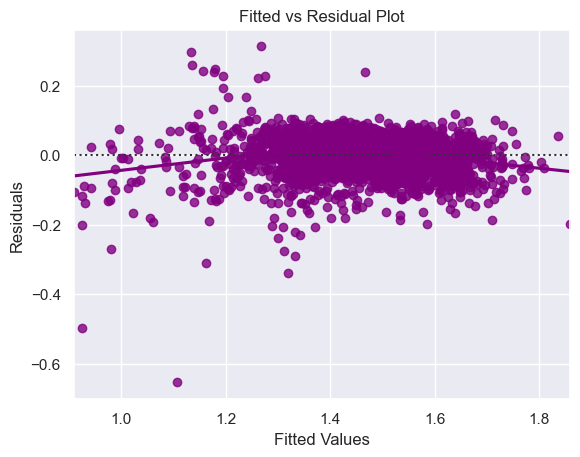

In [ ]:
# Creating a dataframe with actual, fitted, and residual values
df_pred = pd.DataFrame({
    "Actual Values": y_train,  # actual values
    "Fitted Values": olsmodel2.fittedvalues,  # predicted values
    "Residuals": olsmodel2.resid  # residuals
})

# Plotting the fitted values vs residuals
sns.residplot(data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual Plot")
plt.show()


**Observations:**

The plot does not reveal any apparent violations of the linearity or independence assumptions. 

The residuals are randomly distributed around the zero line, indicating that the model's predictions are unbiased on average across the range of fitted values. This observation supports the validity of the OLS regression model.

NORMALITY

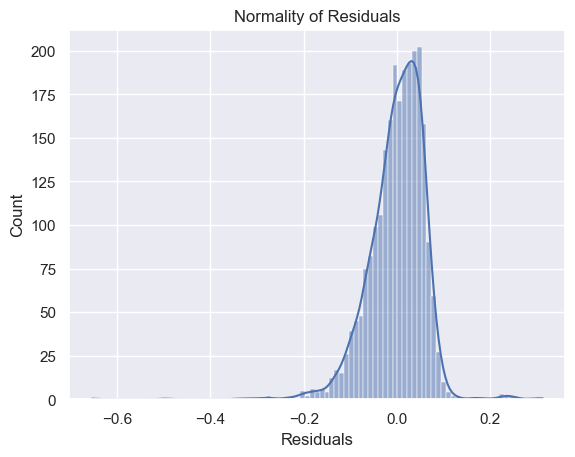

In [ ]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of Residuals")
plt.show()


**Observations:**

The plot suggests that the residuals follow a roughly bell-shaped distribution, indicating potential normality, which is a crucial assumption in linear regression.

To further assess normality:

- Examine a Q-Q (Quantile-Quantile) plot, which provides a detailed visualization of how closely the residuals follow a normal distribution.
- Conduct a Shapiro-Wilk test. A p-value greater than 0.05 would support the hypothesis that the residuals are normally distributed.

These diagnostic tests, alongside the histogram, form a comprehensive approach to validating the model's assumptions and ensuring its robustness.

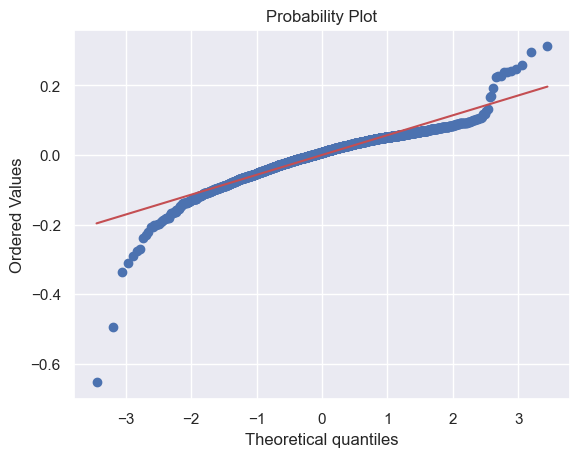

In [ ]:
import pylab
import scipy.stats as stat  # This defines the alias 'stat' for scipy.stats

# Q-Q Plot: plot compares the distribution of residuals with a normal distribution.
stat.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [ ]:
# Shapiro-Wilk Test: assesses normality of residuals
stat.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9145544228139479, pvalue=6.614591541969941e-35)

** Observation **
* p-value is < 0.5 residuals are not normal as per the Sharpiro-Wiki test
* We can accept this distribution as normal
* Assumptions satisfied


HOMESCEDASTICITY

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
# Goldfeld-Quandt Test:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3[selected_features])
lzip(name, test)

[('F statistic', 0.8275686843796728), ('p-value', 0.9994599972971201)]



**Observations:**

The p-value is approximately 1.0, significantly higher than the standard alpha level of 0.05. Therefore, the assumption of homoscedasticity cannot be rejected.

In this instance, the exceptionally high p-value strongly indicates that the residuals exhibit homoscedasticity. This implies that the variance of the residuals does not vary significantly with the fitted values.

Thus, the model satisfies a fundamental assumption of linear regression, ensuring homoscedasticity.

## Final Model

In [ ]:

olsmodel_final = sm.OLS(y_train, x_train3).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.834
Model:                               OLS   Adj. R-squared:                  0.833
Method:                    Least Squares   F-statistic:                     1004.
Date:                   Sat, 29 Jun 2024   Prob (F-statistic):               0.00
Time:                           16:47:06   Log-Likelihood:                 3381.0
No. Observations:                   2417   AIC:                            -6736.
Df Residuals:                       2404   BIC:                            -6661.
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
olsmodel_final_train_perf = model_performance_regression(olsmodel_final, x_train3, y_train)
print("Training Performance\n", olsmodel_final_train_perf)

Training Performance
        RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.059739  0.043913   0.833614        0.832714  3.209821


In [ ]:
olsmodel_final_test_perf = model_performance_regression(olsmodel_final, x_test3, y_test)
print("Test Performance\n", olsmodel_final_test_perf)

Test Performance
        RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.060602  0.045623   0.822389        0.820132  3.313593


## Actionable Insights and Recommendations

CONCLUSION:

1. The model explains approximately 84% of the variation in the data, indicating its effectiveness for both prediction and inference purposes.
   
2. The features most correlated with the used price include: normalized new price, selfie camera, screen size, and battery.
   
3. An increase in screen size by one unit corresponds to a 0.0409 increase in the used price, holding all other variables constant.
   
4. An increase in the new price of the phone by one unit results in a 0.4299 increase in the used price, assuming all other variables remain constant.
   
5. A one-unit increase in selfie camera quality leads to a 0.0130 increase in the used price, with all other variables held constant.
   
6. The number of used devices is declining over the years, which is reasonable considering that as devices age, owners are more likely to purchase new ones, making older devices available for sale (excluding 2019).
   
7. It would be beneficial for the company to classify devices as either tablets or smartphones to enhance prediction and inference capabilities.
   
8. Android OS is installed on 93% of the devices.
   
9. Newer devices tend to have higher average prices; however, the standard deviation increases among devices released from 2018 onwards.
   
10. Devices with less usage generally command higher used prices.
   
11. Normalized new price appears to be the most valuable variable for predicting and inferring the target variable, given its strong correlation with normalized used price and significant statistical significance in regression (P-value = 0).
   
12. Further analysis could involve clustering algorithms like k-means to classify devices into two groups (tablets and smartphones) and develop separate regressions for each group.